In [21]:
% matplotlib inline
#importing dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from census import Census
from us import states 

In [22]:
county_data = pd.read_csv("../Resources/county_commute_data.csv")

In [23]:
county_data.head()

,Name,Metro/Rural,Metro Pole,Total Population,Commuter %,Total Commuters,Solo Commuter %,Solo Commuters,Carpooler %,Carpoolers,Public Transit %,Public Transit,Walking %,Walking,Other Transit %,Other Transit,Latitude,Longitude
0,"Adair County, Missouri",Rural,NaN,25547.0,42.466826,10849.0,77.942668,8456.0,11.383538,1235.0,0.046087,5.0,4.479676,486.0,2.608535,283.0,40.199366,-92.539603
1,"Andrew County, Missouri",Rural,NaN,17347.0,48.406064,8397.0,87.555079,7352.0,6.752412,567.0,0.059545,5.0,1.083720,91.0,0.559724,47.0,39.963744,-94.810595
2,"Atchison County, Missouri",Rural,NaN,5380.0,48.271375,2597.0,82.864844,2152.0,9.087409,236.0,0.154024,4.0,3.273007,85.0,0.577590,15.0,40.423896,-95.477781
3,"Audrain County, Missouri",Rural,NaN,25868.0,40.915417,10584.0,79.969766,8464.0,10.393046,1100.0,0.340136,36.0,3.354119,355.0,2.598262,275.0,39.221953,-91.909924
4,"Barry County, Missouri",Rural,NaN,35716.0,38.876134,13885.0,78.811667,10943.0,12.466691,1731.0,0.316889,44.0,2.211019,307.0,1.094707,152.0,36.634526,-93.824824


In [24]:
#creating groupby object for further analysis
metro_rural_group = county_data.groupby('Metro/Rural')

In [25]:
metro_rural_group.count().head()

,Name,Metro Pole,Total Population,Commuter %,Total Commuters,Solo Commuter %,Solo Commuters,Carpooler %,Carpoolers,Public Transit %,Public Transit,Walking %,Walking,Other Transit %,Other Transit,Latitude,Longitude
Metro/Rural,,,,,,,,,,,,,,,,,
Metro,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21
Rural,94,0,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94


In [26]:
#basic calculations
mr_total_population = metro_rural_group['Total Population'].sum()
mr_total_commuters = metro_rural_group["Total Commuters"].sum()
mr_commuter_pct = mr_total_commuters/mr_total_population * 100 
mr_total_solo_commuters = metro_rural_group['Solo Commuters'].sum()
mr_solo_commuters_pct = mr_total_solo_commuters/mr_total_commuters * 100
mr_total_carpoolers = metro_rural_group['Carpoolers'].sum()
mr_carpoolers_pct = mr_total_carpoolers/mr_total_commuters * 100
mr_total_public = metro_rural_group['Public Transit'].sum()
mr_public_pct = mr_total_public/mr_total_commuters * 100 
mr_total_walking = metro_rural_group['Walking'].sum()
mr_total_walking_pct = mr_total_walking/mr_total_commuters * 100 
mr_total_other = metro_rural_group['Other Transit'].sum()
mr_other_pct = mr_total_other/mr_total_commuters * 100 

In [8]:
metro_rural_df = pd.DataFrame({"Total Population": mr_total_population,
                              "Total Commuters": mr_total_commuters,
                              "Commuter %": mr_commuter_pct,
                              "Solo Commuters": mr_total_solo_commuters,
                              "Solo Commuters %": mr_solo_commuters_pct,
                              "Carpoolers": mr_total_carpoolers,
                              "Carpoolers %": mr_carpoolers_pct,
                              "Public Transit": mr_total_public,
                              "Public Transit %": mr_public_pct,
                              "Walking": mr_total_walking,
                              "Walking %": mr_total_walking_pct,
                              "Other Transit": mr_total_other,
                              "Other Transit %": mr_other_pct})

In [9]:
#displaying Metro vs. Rural DataFrame 
metro_rural_df

,Total Population,Total Commuters,Commuter %,Solo Commuters,Solo Commuters %,Carpoolers,Carpoolers %,Public Transit,Public Transit %,Walking,Walking %,Other Transit,Other Transit %
Metro/Rural,,,,,,,,,,,,,
Metro,3775582.0,1821438.0,48.242576,1503940.0,82.568827,146532.0,8.044852,37968.0,2.084507,29809.0,1.636564,21764.0,1.194880
Rural,2284069.0,982199.0,43.002160,784977.0,79.920362,108728.0,11.069854,3773.0,0.384138,23748.0,2.417840,14166.0,1.442274


In [10]:
rural_df = metro_rural_df.drop(['Metro'])


In [11]:
rural_df

,Total Population,Total Commuters,Commuter %,Solo Commuters,Solo Commuters %,Carpoolers,Carpoolers %,Public Transit,Public Transit %,Walking,Walking %,Other Transit,Other Transit %
Metro/Rural,,,,,,,,,,,,,
Rural,2284069.0,982199.0,43.00216,784977.0,79.920362,108728.0,11.069854,3773.0,0.384138,23748.0,2.41784,14166.0,1.442274


In [12]:
metro_df = metro_rural_df.drop(['Rural'])

In [13]:
metro_df

,Total Population,Total Commuters,Commuter %,Solo Commuters,Solo Commuters %,Carpoolers,Carpoolers %,Public Transit,Public Transit %,Walking,Walking %,Other Transit,Other Transit %
Metro/Rural,,,,,,,,,,,,,
Metro,3775582.0,1821438.0,48.242576,1503940.0,82.568827,146532.0,8.044852,37968.0,2.084507,29809.0,1.636564,21764.0,1.19488


In [14]:
commute_types = ['Solo Commuter %', 'Carpooler %','Public Transit %', 'Walking %','Other Transit %']
commute_numbers = []
commute_numbers.append(rural_df['Solo Commuters'])
commute_numbers.append(rural_df['Carpoolers'])
commute_numbers.append(rural_df['Public Transit'])
commute_numbers.append(rural_df['Walking'])
commute_numbers.append(rural_df['Other Transit'])

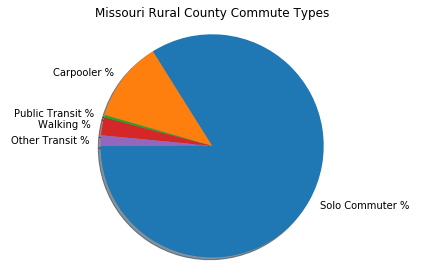

In [15]:
plt.pie(commute_numbers, labels=commute_types, shadow=True, startangle=180)
plt.axis('equal')


plt.axis("equal")
plt.title("Missouri Rural County Commute Types")
plt.tight_layout()

#export figure
plt.savefig("../Output/MO_rural_commute_types_pie.png")

In [16]:
metro_rural_commute_percs = metro_rural_df[["Solo Commuters %", "Carpoolers %", "Public Transit %", "Walking %", "Other Transit %"]]
metro_rural_commute_percs

,Solo Commuters %,Carpoolers %,Public Transit %,Walking %,Other Transit %
Metro/Rural,,,,,
Metro,82.568827,8.044852,2.084507,1.636564,1.194880
Rural,79.920362,11.069854,0.384138,2.417840,1.442274


In [17]:
rural_percs = metro_rural_commute_percs.loc["Rural", :]
metro_percs = metro_rural_commute_percs.loc["Metro", :]


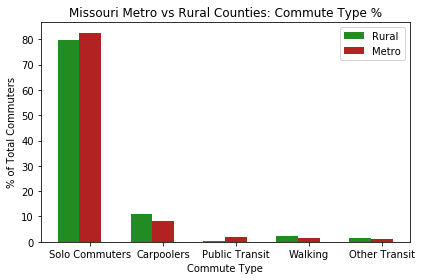

In [20]:
#list commute types
commute_types = ["Solo Commuters", "Carpoolers", "Public Transit", "Walking", "Other Transit"]
#set #s for x axis
x_axis = np.arange(0, 5)

#locate commute type %s for metro/rural counties
rural_percs = metro_rural_commute_percs.loc["Rural", :]
metro_percs = metro_rural_commute_percs.loc["Metro", :]


#create metro/rural commute type graph
metro_rural_commute_plot = plt.figure()
metro_rural_commutes = plt.subplot()

#plot each metro area's %s
rural_plot = metro_rural_commutes.bar(x_axis-.3, rural_percs, width = .3, color = "forestgreen", label = "Rural")
metro_plot = metro_rural_commutes.bar(x_axis, metro_percs, width = .3, color = "firebrick", label = "Metro")


#graph formatting
plt.legend(loc = "best")
plt.xticks(x_axis, commute_types)
plt.title("Missouri Metro vs Rural Counties: Commute Type %")
plt.xlabel("Commute Type")
plt.ylabel("% of Total Commuters")
plt.tight_layout()

#export figure
metro_rural_commute_plot.savefig("..\Output\MO_metro_vs_Rural_Counties_bar.png")